# Take-Home Assignment 3: Research Question and Dataset

## Find a simple research question and compile a dataset to answer that question.

### Research Question: What correlation, if any, exists between crime and average per capita income (PCI) across Chicago's 77 community areas?

##### To address this question, I first bring in the necessary packages:

In [1]:
import numpy as np                 
import pandas as pd 
 
import matplotlib.pyplot as plt     
import seaborn as sns            
import datetime as dt                


%matplotlib inline
print(plt.style.available)
plt.style.use('ggplot')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


#### Then, I bring in a dataset taken from Kaggle (https://www.kaggle.com/currie32/crimes-in-chicago), which contains reported crime incidents in Chicago, originally reported by the Chicago Police Department. 

#### The year range of this particular portion of the data covers 2012-2017.

In [2]:
crime = pd.read_csv("chicrime.csv")

##### The following portion of this notebook covers the process of compiling the dataset used for the analysis. Many of the initital variables do not play a role in the final analysis and thus are not included in the data dictionary located in the GitHub repository. 

##### However, any relevant variables in this notebook will nonetheless be clear and explained as we proceed. 

In [3]:
print(crime.shape)
crime.columns

(1456714, 23)


Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


##### Under 'Primary Type' we observe the categorical types of crimes included in CPD's reporting: 

In [5]:
crime['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

##### After exploring the variable, 'Community Area', which provides a numerical representation for each Chicago community area, we observe a minimum value of 0, as well as 'nan' values that will need to be removed.  

In [6]:
print(crime['Community Area'].describe())
crime['Community Area'].unique()

count    1.456674e+06
mean     3.745632e+01
std      2.144029e+01
min      0.000000e+00
25%      2.300000e+01
50%      3.200000e+01
75%      5.600000e+01
max      7.700000e+01
Name: Community Area, dtype: float64


array([29., 42., 25., 44., 35., 38.,  1., 67., 43.,  8., 28., 24., 66.,
       40., 73., 39., 41.,  7., 10., 34., 58., 71., 32., 23.,  6., 77.,
       49., 61., 21., 54., 56., 46., 19., 60., 68., 59., 22., 26., 45.,
       30., 11., 69., 31.,  3., 15.,  2., 63., 36., 75., 65., 17., 13.,
       33., 14., 27., 16., 47., 37., 53.,  9., 51., 50., 76., 62.,  4.,
       57., 52., 70., 48., 18., 20.,  5., 64., 12., 74., 55., 72., nan,
        0.])

In [7]:
print('Shape before removal of 0 and NaN values:', crime.shape)

Shape before removal of 0 and NaN values: (1456714, 23)


##### We convert all 0 values to NaN to be included upon use of the .dropna method.

In [8]:
crime['Community Area'] = crime['Community Area'].replace({0.0: np.nan})
crime.dropna(inplace=True)
print('Shape after removal of 0 and NaN values:', crime.shape)

Shape after removal of 0 and NaN values: (1418364, 23)


In [9]:
crime['Community Area']=crime['Community Area'].astype(int)

##### While Community Area numbers are helpful, the names of the actual neighborhoods are more useful for a full understanding of the data.

##### I gathered the names of Chicago's neighborhoods from the City of Chicago's municipal website, https://www.chicago.gov/content/dam/city/depts/doit/general/GIS/Chicago_Maps/Citywide_Maps/Community_Areas_W_Numbers.pdf, and compiled them into AreaNames.csv. 

##### Fortunately, the numbers line up exactly with those from the Kaggle crime dataset.

In [10]:
com_names=pd.read_csv('AreaNames.csv')
com_names.reset_index(inplace=True)
com_names

,index,NAME
0,0,blank
1,1,Rogers Park
2,2,West Ridge
3,3,Uptown
4,4,Lincoln Square
5,5,North Center
6,6,Lake View
7,7,Lincoln Park
8,8,Near North Side
9,9,Edison Park


##### To merge the two sets, we first convert the community names into a dictionary...

In [11]:
com_names = com_names.set_index('index').T.to_dict('list')

In [12]:
com_names

{0: ['blank'],
 1: ['Rogers Park'],
 2: ['West Ridge'],
 3: ['Uptown'],
 4: ['Lincoln Square'],
 5: ['North Center'],
 6: ['Lake View'],
 7: ['Lincoln Park'],
 8: ['Near North Side'],
 9: ['Edison Park'],
 10: ['Norwood Park'],
 11: ['Jefferson Park'],
 12: ['Forest Glen'],
 13: ['North Park'],
 14: ['Albany Park'],
 15: ['Portage Park'],
 16: ['Irving Park'],
 17: ['Dunning'],
 18: ['Montclare'],
 19: ['Belmont Cragin'],
 20: ['Hermosa'],
 21: ['Avondale'],
 22: ['Logan Square'],
 23: ['Humboldt Park'],
 24: ['West Town'],
 25: ['Austin'],
 26: ['West Garfield Park'],
 27: ['East Garfield Park'],
 28: ['Near West Side'],
 29: ['North Lawndale'],
 30: ['South Lawndale'],
 31: ['Lower West Side'],
 32: ['Loop'],
 33: ['Near South Side'],
 34: ['Armour Square'],
 35: ['Douglas'],
 36: ['Oakland'],
 37: ['Fuller Park'],
 38: ['Grand Boulevard'],
 39: ['Kenwood'],
 40: ['Washington Park'],
 41: ['Hyde Park'],
 42: ['Woodlawn'],
 43: ['South Shore'],
 44: ['Chatham'],
 45: ['Avalon Park'],


##### ... then we map the area names to area numbers in the crime data set.

In [13]:
crime['Community Area'].head()

0    29
1    42
2    25
3    25
4    25
Name: Community Area, dtype: int64

In [14]:
crime["Community Area Name"] = crime['Community Area'].map(com_names)
crime["Community Area Name"].head()

0    [North Lawndale]
1          [Woodlawn]
2            [Austin]
3            [Austin]
4            [Austin]
Name: Community Area Name, dtype: object

##### We then clean up the column by removing unncessary brackets. 

In [15]:
crime["Community Area Name"] = crime["Community Area Name"].astype(str)
crime["Community Area Name"] = crime['Community Area Name'].map(lambda x: x.lstrip("'[").rstrip("']"))
crime["Community Area Name"].head(30)

0         North Lawndale
1               Woodlawn
2                 Austin
3                 Austin
4                 Austin
5                Chatham
6                Douglas
7        Grand Boulevard
8            Rogers Park
9         West Englewood
10           South Shore
11       Near North Side
12        Near West Side
13               Douglas
14             West Town
15          Chicago Lawn
16             West Town
17       Washington Park
18    Washington Heights
19               Kenwood
20             West Town
21             Hyde Park
22          Lincoln Park
23          Norwood Park
24       Near North Side
25    Washington Heights
26          Lincoln Park
27         Armour Square
28         Brighton Park
29        Auburn Gresham
Name: Community Area Name, dtype: object

In [16]:
crime["Community Area Name"].unique()

array(['North Lawndale', 'Woodlawn', 'Austin', 'Chatham', 'Douglas',
       'Grand Boulevard', 'Rogers Park', 'West Englewood', 'South Shore',
       'Near North Side', 'Near West Side', 'West Town', 'Chicago Lawn',
       'Washington Park', 'Washington Heights', 'Kenwood', 'Hyde Park',
       'Lincoln Park', 'Norwood Park', 'Armour Square', 'Brighton Park',
       'Auburn Gresham', 'Loop', 'Humboldt Park', 'Lake View',
       'Edgewater', 'Roseland', 'New City', 'Avondale', 'Riverdale',
       'Garfield Ridge', 'South Chicago', 'Belmont Cragin', 'Bridgeport',
       'Englewood', 'McKinley Park', 'Logan Square', 'West Garfield Park',
       'Avalon Park', 'South Lawndale', 'Jefferson Park',
       'Greater Grand Crossing', 'Lower West Side', 'Uptown',
       'Portage Park', 'West Ridge', 'Gage Park', 'Oakland',
       'Morgan Park', 'West Lawn', 'Dunning', 'North Park',
       'Near South Side', 'Albany Park', 'East Garfield Park',
       'Irving Park', 'Fuller Park', 'West Pullman', '

In [17]:
crime[['Community Area','Community Area Name']].head()

,Community Area,Community Area Name
0,29,North Lawndale
1,42,Woodlawn
2,25,Austin
3,25,Austin
4,25,Austin


##### After merging the area names, we remove unnecessary variables from the dataframe. 

In [18]:
crime = crime[['ID','Primary Type','Description','Arrest','Community Area','Year','Location','Community Area Name']]
crime.head()

,ID,Primary Type,Description,Arrest,Community Area,Year,Location,Community Area Name
0,10508693,BATTERY,DOMESTIC BATTERY SIMPLE,True,29,2016,"(41.864073157, -87.706818608)",North Lawndale
1,10508695,BATTERY,DOMESTIC BATTERY SIMPLE,False,42,2016,"(41.782921527, -87.60436317)",Woodlawn
2,10508697,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False,25,2016,"(41.894908283, -87.758371958)",Austin
3,10508698,BATTERY,SIMPLE,False,25,2016,"(41.885686845, -87.749515983)",Austin
4,10508699,THEFT,$500 AND UNDER,False,25,2016,"(41.886297242, -87.761750709)",Austin


##### We now bring in data that includes the Average PCI for each of Chicago's community areas. This data was provided by http://www.chicagocomputerclasses.com/ and originally compiled using a public dataset released by the City of Chicago.

In [19]:
pci=pd.read_csv('pci_data.csv')
pci

,Name,Average Per Capita Income (PCI)
0,Near North Side,"$88,669.00"
1,Lincoln Park,"$71,551.00"
2,Loop,"$65,526.00"
3,Lake View,"$60,058.00"
4,Near South Side,"$59,077.00"
5,North Center,"$57,123.00"
6,Near West Side,"$44,689.00"
7,Forest Glen,"$44,164.00"
8,West Town,"$43,198.00"
9,Edison Park,"$40,959.00"


##### We repeat the process from before, converting the data into a dictionary for mapping to our main set, this time based on area name, as opposed to area number.

In [20]:
pci = pci.set_index('Name').T.to_dict('list')
pci

{'Near North Side': ['$88,669.00'],
 'Lincoln Park': ['$71,551.00'],
 'Loop': ['$65,526.00'],
 'Lake View': ['$60,058.00'],
 'Near South Side': ['$59,077.00'],
 'North Center': ['$57,123.00'],
 'Near West Side': ['$44,689.00'],
 'Forest Glen': ['$44,164.00'],
 'West Town': ['$43,198.00'],
 'Edison Park': ['$40,959.00'],
 'Beverly': ['$39,523.00'],
 'Hyde Park': ['$39,056.00'],
 'Lincoln Square': ['$37,524.00'],
 'Kenwood': ['$35,911.00'],
 'Uptown': ['$35,787.00'],
 'Mount Greenwood': ['$34,381.00'],
 'Edgewater': ['$33,385.00'],
 'Norwood Park': ['$32,875.00'],
 'Logan Square': ['$31,908.00'],
 'Calumet Heights': ['$28,887.00'],
 'Jefferson Park': ['$27,751.00'],
 'Irving Park': ['$27,249.00'],
 'Morgan Park': ['$27,149.00'],
 'North Park': ['$26,576.00'],
 'Garfield Ridge': ['$26,353.00'],
 'Dunning': ['$26,282.00'],
 'OHare': ['$25,828.00'],
 'Clearing': ['$25,113.00'],
 'Avalon Park': ['$24,454.00'],
 'Portage Park': ['$24,336.00'],
 'Rogers Park': ['$23,939.00'],
 'Douglas': ['$23

In [21]:
crime["Average Per Capita Income"] = crime['Community Area Name'].map(pci)
crime.head()

,ID,Primary Type,Description,Arrest,Community Area,Year,Location,Community Area Name,Average Per Capita Income
0,10508693,BATTERY,DOMESTIC BATTERY SIMPLE,True,29,2016,"(41.864073157, -87.706818608)",North Lawndale,"[$12,034.00]"
1,10508695,BATTERY,DOMESTIC BATTERY SIMPLE,False,42,2016,"(41.782921527, -87.60436317)",Woodlawn,"[$18,672.00]"
2,10508697,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False,25,2016,"(41.894908283, -87.758371958)",Austin,"[$15,957.00]"
3,10508698,BATTERY,SIMPLE,False,25,2016,"(41.885686845, -87.749515983)",Austin,"[$15,957.00]"
4,10508699,THEFT,$500 AND UNDER,False,25,2016,"(41.886297242, -87.761750709)",Austin,"[$15,957.00]"


##### We remove unnecessary characters...

In [22]:
crime["Average Per Capita Income"] = crime["Average Per Capita Income"].astype(str)
crime["Average Per Capita Income"].head()

0    ['$12,034.00']
1    ['$18,672.00']
2    ['$15,957.00']
3    ['$15,957.00']
4    ['$15,957.00']
Name: Average Per Capita Income, dtype: object

In [23]:
crime["Average Per Capita Income"] = crime["Average Per Capita Income"].map(lambda x: x.lstrip("['$").rstrip(".00']").replace(',',''))
crime["Average Per Capita Income"].head()

0    12034
1    18672
2    15957
3    15957
4    15957
Name: Average Per Capita Income, dtype: object

##### After we re-convert the numbers back into integers and describe the data, we notice the minimum Avg PCI value is 2304, which is clearly an error. 

In [24]:
crime["Average Per Capita Income"] = crime["Average Per Capita Income"].astype(int)
crime["Average Per Capita Income"].describe()

count    1.418364e+06
mean     2.561605e+04
std      1.887672e+04
min      2.304000e+03
25%      1.378100e+04
50%      1.794900e+04
75%      2.775100e+04
max      8.866900e+04
Name: Average Per Capita Income, dtype: float64

In [25]:
crime[crime['Average Per Capita Income']==2304].head()

,ID,Primary Type,Description,Arrest,Community Area,Year,Location,Community Area Name,Average Per Capita Income
81,10509800,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2,2016,"(41.99973106, -87.705809711)",West Ridge,2304
195,10404916,ROBBERY,AGGRAVATED,True,2,2016,"(42.004487311, -87.679846425)",West Ridge,2304
196,10417926,ROBBERY,AGGRAVATED,True,2,2016,"(42.009087258, -87.690171862)",West Ridge,2304
267,10508847,CRIMINAL TRESPASS,TO RESIDENCE,True,2,2016,"(41.989502743, -87.695721082)",West Ridge,2304
277,10509050,BATTERY,DOMESTIC BATTERY SIMPLE,False,2,2016,"(41.996457737, -87.695938606)",West Ridge,2304


##### Somewhere in the cleaning stage, we lost a 0 for the Avg PCI of the West Ridge community area, so we implement a quick a fix:

In [26]:
crime['Average Per Capita Income'].replace(2304,23040, inplace=True)
crime['Average Per Capita Income'].describe()

count    1.418364e+06
mean     2.586770e+04
std      1.870167e+04
min      8.201000e+03
25%      1.378500e+04
50%      1.794900e+04
75%      2.775100e+04
max      8.866900e+04
Name: Average Per Capita Income, dtype: float64

##### We then rename relevant variables. 

In [27]:
crime.rename({"Community Area Name": "Area Name", "Community Area": 'Area Number','ID':'Crime ID'}, axis = 'columns', inplace=True )
crime.head()

,Crime ID,Primary Type,Description,Arrest,Area Number,Year,Location,Area Name,Average Per Capita Income
0,10508693,BATTERY,DOMESTIC BATTERY SIMPLE,True,29,2016,"(41.864073157, -87.706818608)",North Lawndale,12034
1,10508695,BATTERY,DOMESTIC BATTERY SIMPLE,False,42,2016,"(41.782921527, -87.60436317)",Woodlawn,18672
2,10508697,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False,25,2016,"(41.894908283, -87.758371958)",Austin,15957
3,10508698,BATTERY,SIMPLE,False,25,2016,"(41.885686845, -87.749515983)",Austin,15957
4,10508699,THEFT,$500 AND UNDER,False,25,2016,"(41.886297242, -87.761750709)",Austin,15957


##### The ID/Count ID variable is particularly important as there exists a unique Count ID for each observation in the set, allowing us to calculate crime incident counts. 

In [28]:
print(crime.shape)
print(crime['Crime ID'].nunique())

(1418364, 9)
1418364


##### We further narrow the dataset...

In [29]:
area_crime = crime[['Crime ID','Area Name','Average Per Capita Income']]

##### ... then convert each Crime ID to 1, as an indicator variable.

In [30]:
area_crime['Crime ID'] = area_crime['Crime ID']=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### We group Area Name and Crime ID together, then calculate the number of crimes reported for each community area.

In [31]:
area_crime = crime.groupby('Area Name')['Crime ID'].nunique()
area_crime = pd.DataFrame(area_crime)
area_crime = area_crime.rename(columns={"Average Per Capita Income": "AvgPCI","Area Name": "Area"})
area_crime.head()

,Crime ID
Area Name,
Albany Park,12714
Archer Heights,5244
Armour Square,6053
Ashburn,12980
Auburn Gresham,40624


##### We then group the Area Names with their respective Avg PCIs to add to the new dataframe. 

In [32]:
area_pci = crime.groupby('Area Name')['Average Per Capita Income'].unique()
area_pci = pd.DataFrame(area_pci)
area_pci["Average Per Capita Income"] = area_pci["Average Per Capita Income"].astype(str)
area_pci["Average Per Capita Income"] = area_pci["Average Per Capita Income"].map(lambda x: x.lstrip("[").rstrip("]"))
area_pci["Average Per Capita Income"] = area_pci["Average Per Capita Income"].astype(int)
area_pci.head()

,Average Per Capita Income
Area Name,
Albany Park,21323
Archer Heights,16134
Armour Square,16148
Ashburn,23482
Auburn Gresham,15528


##### We combine the new dataframes together.

In [33]:
crime_pci = pd.concat([area_crime, area_pci], axis=1, sort=False)
crime_pci.rename(columns={"Crime ID":"Crime","Average Per Capita Income":"AvgPCI"},inplace=True)
crime_pci.head()

,Crime,AvgPCI
Area Name,,
Albany Park,12714,21323
Archer Heights,5244,16134
Armour Square,6053,16148
Ashburn,12980,23482
Auburn Gresham,40624,15528


In [34]:
crime_pci.reset_index(inplace=True)

In [35]:
crime_pci.tail()

,Area Name,Crime,AvgPCI
72,West Lawn,10812,16907
73,West Pullman,22645,16563
74,West Ridge,17213,23040
75,West Town,39680,43198
76,Woodlawn,21284,18672


##### We visualize the distribution of the Avg PCI data, and see that, unsurprisingly, the data is heavily skewed to the right. 

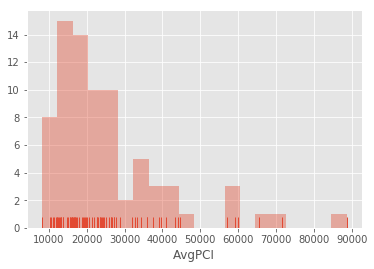

In [36]:
sns.distplot(crime_pci['AvgPCI'], bins=20, kde=False, rug=True);

In [37]:
crime_pci.head()

,Area Name,Crime,AvgPCI
0,Albany Park,12714,21323
1,Archer Heights,5244,16134
2,Armour Square,6053,16148
3,Ashburn,12980,23482
4,Auburn Gresham,40624,15528


In [38]:
crime_pci.rename(columns={"Area Name":"Area"},inplace=True)

##### We now bring in data from the 2010 U.S. Census summarizing the total population of each community area in Chicago. 

##### We will use this information to calculate crime rates. 

In [39]:
pop = pd.read_csv('areapop.csv')
pop.head()

,GEOGNAME,P0050001,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Geog,Total Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rogers Park,54991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,West Ridge,71942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Uptown,56362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lincoln Square,39493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
pop = pop[['GEOGNAME', 'P0050001']]
pop.head()

,GEOGNAME,P0050001
0,Geog,Total Population
1,Rogers Park,54991
2,West Ridge,71942
3,Uptown,56362
4,Lincoln Square,39493


###### More mapping...

In [41]:
pop = pop.set_index('GEOGNAME').T.to_dict('list')
pop

{'Geog': ['Total Population'],
 'Rogers Park': ['54991'],
 'West Ridge': ['71942'],
 'Uptown': ['56362'],
 'Lincoln Square': ['39493'],
 'North Center': ['31867'],
 'Lake View': ['94368'],
 'Lincoln Park': ['64116'],
 'Near North Side': ['80484'],
 'Edison Park': ['11187'],
 'Norwood Park': ['37023'],
 'Jefferson Park': ['25448'],
 'Forest Glen': ['18508'],
 'North Park': ['17931'],
 'Albany Park': ['51542'],
 'Portage Park': ['64124'],
 'Irving Park': ['53359'],
 'Dunning': ['41932'],
 'Montclare': ['13426'],
 'Belmont Cragin': ['78743'],
 'Hermosa': ['25010'],
 'Avondale': ['39262'],
 'Logan Square': ['72791'],
 'Humboldt Park': ['56323'],
 'West Town': ['82236'],
 'Austin': ['98514'],
 'West Garfield Park': ['18001'],
 'East Garfield Park': ['20567'],
 'Near West Side': ['54881'],
 'North Lawndale': ['35912'],
 'South Lawndale': ['79288'],
 'Lower West Side': ['35769'],
 'Loop': ['29283'],
 'Near South Side': ['21390'],
 'Armour Square': ['13391'],
 'Douglas': ['18238'],
 'Oakland':

In [42]:
crime_pci["pop"] = crime_pci['Area'].map(pop)
crime_pci.head()

,Area,Crime,AvgPCI,pop
0,Albany Park,12714,21323,[51542]
1,Archer Heights,5244,16134,[13393]
2,Armour Square,6053,16148,[13391]
3,Ashburn,12980,23482,[41081]
4,Auburn Gresham,40624,15528,[48743]


In [43]:
crime_pci['pop'] = crime_pci['pop'].astype(str)
crime_pci['pop'] = crime_pci['pop'].map(lambda x: x.lstrip("[").rstrip("]"))
crime_pci['pop'] = crime_pci['pop'].map(lambda x: x.lstrip("'").rstrip("'"))

In [44]:
crime_pci['pop'] = crime_pci['pop'].astype(int)
crime_pci.head()

,Area,Crime,AvgPCI,pop
0,Albany Park,12714,21323,51542
1,Archer Heights,5244,16134,13393
2,Armour Square,6053,16148,13391
3,Ashburn,12980,23482,41081
4,Auburn Gresham,40624,15528,48743


##### Now that we have populations, we can calculate crime rates for each area and add our results to the dataframe. 

In [45]:
crime_pci['crimerate'] = crime_pci['Crime'] / crime_pci['pop']

In [46]:
crime_pci.head()

,Area,Crime,AvgPCI,pop,crimerate
0,Albany Park,12714,21323,51542,0.246673
1,Archer Heights,5244,16134,13393,0.391548
2,Armour Square,6053,16148,13391,0.452020
3,Ashburn,12980,23482,41081,0.315961
4,Auburn Gresham,40624,15528,48743,0.833432


##### We are now ready to address our research question, first by graphing a scatterplot of the crime rates and the Avg PCIs to identify any general relationship between the variables. 

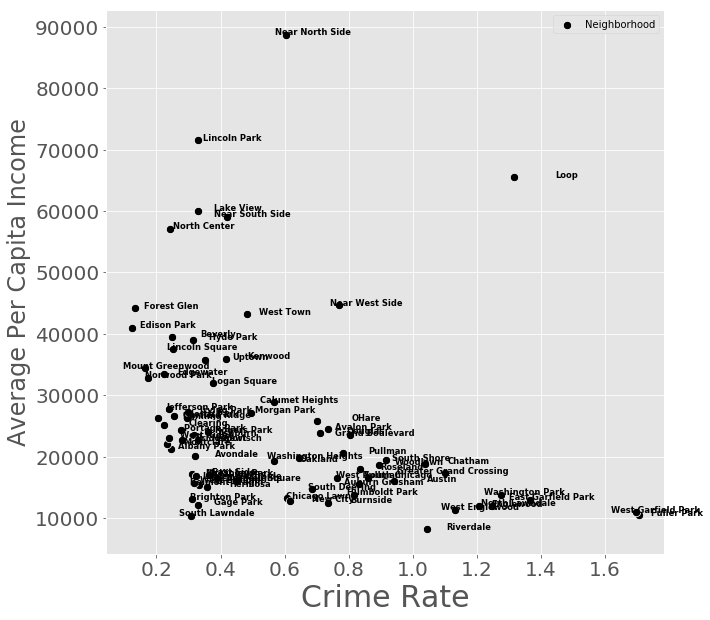

In [47]:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x="crimerate", y="AvgPCI", data=crime_pci, s=70, color='k', label='Neighborhood')
ax.set_xlabel("Crime Rate",fontsize=30)
ax.tick_params(labelsize=20)
ax.set_ylabel("Average Per Capita Income",fontsize=24)

for line in range(0,crime_pci.shape[0]):
     ax.text(crime_pci.crimerate[line]+0.2, crime_pci.AvgPCI[line], crime_pci.Area[line], horizontalalignment='right', size='small', color='black', weight='semibold')

##### There appears to be a slight, yet clearly observable negative relationship between crime rate and Avg PCI, and the relationship seems to follow a polynomial curve. 

##### We add a best fit line for a better look. 

Text(0, 0.5, 'Average Per Capita Income')

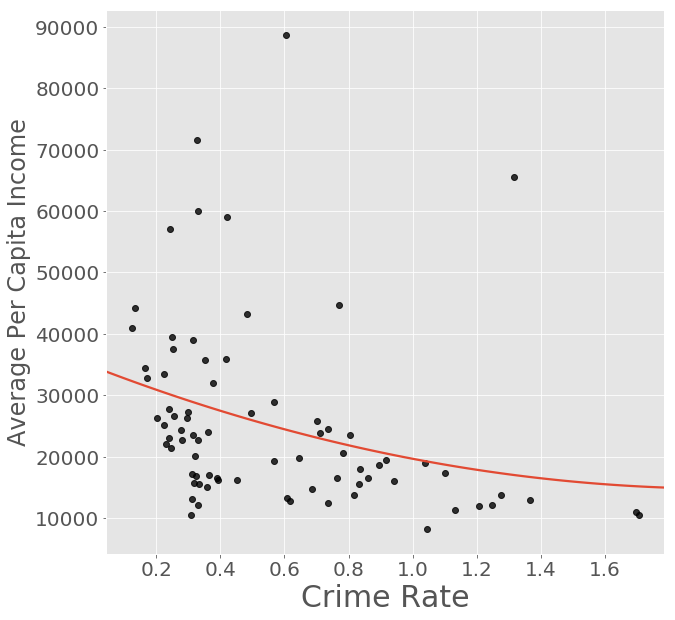

In [48]:
plt.figure(figsize=(10, 10))
ax3 = sns.regplot(x="crimerate", y="AvgPCI", data=crime_pci, order=2,
           ci=None, scatter_kws={"color": "black"});
ax3.set_xlabel("Crime Rate",fontsize=30)
ax3.tick_params(labelsize=20)
ax3.set_ylabel("Average Per Capita Income",fontsize=24)

##### While there does seem to be a negative relationship between the variables based on the best fit line, the correlation still seems fairly weak. 

##### We construct a correlation matrix, and find that there is indeed a weak negative relationship between crime rate and Avg PCI in this dataset. 

In [49]:
corr=crime_pci[['AvgPCI','crimerate']].corr()
corr.style.background_gradient()

,AvgPCI,crimerate
AvgPCI,1,-0.296589
crimerate,-0.296589,1


##### Personally, I expected there to be a stronger relationship between crime and income inequality. I'm suspicious that the wide variety of types of crimes included in the data is to blame for the weaker relationship. 

In [50]:
crime['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

#### So, we will now narrow it down to only violent crimes to see if we arrive at different results. 

In [51]:
vcrime = crime.groupby(['Area Name','Average Per Capita Income','Primary Type'])['Crime ID'].nunique()
vcrime = pd.DataFrame(vcrime)
vcrime

Crime ID
Area Name      Average Per Capita Income Primary Type                               
Albany Park    21323                     ARSON                                    27
                                         ASSAULT                                 736
                                         BATTERY                                2417
                                         BURGLARY                                841
                                         CONCEALED CARRY LICENSE VIOLATION         1
                                         CRIM SEXUAL ASSAULT                      56
                                         CRIMINAL DAMAGE                        1825
                                         CRIMINAL TRESPASS                       222
                                         DECEPTIVE PRACTICE                      465
                                         GAMBLING                                  4
                                         HOMICIDE                                 18
                                         INTERFERENCE WITH PUBLIC OFFICER         31
                                         INTIMIDATION                             10
                                         KIDNAPPING                               13
                                         LIQUOR LAW VIOLATION                     34
                                         MOTOR VEHICLE THEFT                     792
                                         NARCOTICS                               666
                                         OBSCENITY                                 1
                                         OFFENSE INVOLVING CHILDREN              104
                                         OTHER OFFENSE                           758
                                         PROSTITUTION                             51
                                         PUBLIC INDECENCY                          1
                                         PUBLIC PEACE VIOLATION                  116
                                         ROBBERY                                 564
                                         SEX OFFENSE                              67
                                         STALKING                                  5
                                         THEFT                                  2782
                                         WEAPONS VIOLATION                       107
Archer Heights 16134                     ARSON                                    10
                                         ASSAULT                                 277
...                                                                              ...
West Town      43198                     THEFT                                 14302
                                         WEAPONS VIOLATION                       161
Woodlawn       18672                     ARSON                                    27
                                         ASSAULT                                1582
                                         BATTERY                                4546
                                         BURGLARY                               1481
                                         CONCEALED CARRY LICENSE VIOLATION         1
                                         CRIM SEXUAL ASSAULT                      80
                                         CRIMINAL DAMAGE                        2254
                                         CRIMINAL TRESPASS                       675
                                         DECEPTIVE PRACTICE                      615
                                         GAMBLING                                 62
                                         HOMICIDE                                 47
                                         HUMAN TRAFFICKING                         1
                                         INTERFERENCE WITH PUBLIC OFFICER        

##### We narrow down the crimes in question to Battery, Assault, and Homicide...

In [52]:
vcrime = crime.ix[(crime['Primary Type']=='BATTERY') | (crime['Primary Type']=='Assault') | (crime['Primary Type']=='HOMICIDE')]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [53]:
vcrime.head()

,Crime ID,Primary Type,Description,Arrest,Area Number,Year,Location,Area Name,Average Per Capita Income
0,10508693,BATTERY,DOMESTIC BATTERY SIMPLE,True,29,2016,"(41.864073157, -87.706818608)",North Lawndale,12034
1,10508695,BATTERY,DOMESTIC BATTERY SIMPLE,False,42,2016,"(41.782921527, -87.60436317)",Woodlawn,18672
3,10508698,BATTERY,SIMPLE,False,25,2016,"(41.885686845, -87.749515983)",Austin,15957
5,10508702,BATTERY,AGGRAVATED: HANDGUN,False,44,2016,"(41.745354023, -87.603798903)",Chatham,18881
6,10508703,BATTERY,SIMPLE,False,35,2016,"(41.844023772, -87.626923253)",Douglas,23791


##### ... then gather up the crime counts, just as we did before. 

In [54]:
vcrime = vcrime.groupby(['Area Name','Average Per Capita Income'])['Crime ID'].nunique()
vcrime = pd.DataFrame(vcrime)

In [55]:
vcrime.reset_index(inplace=True)
vcrime

,Area Name,Average Per Capita Income,Crime ID
0,Albany Park,21323,2435
1,Archer Heights,16134,754
2,Armour Square,16148,978
3,Ashburn,23482,1962
4,Auburn Gresham,15528,8979
5,Austin,15957,19243
6,Avalon Park,24454,1469
7,Avondale,20039,2044
8,Belmont Cragin,15461,4980
9,Beverly,39523,568


In [56]:
vcrime.rename(columns={"Area Name":"area","Average Per Capita Income":"avgpci","Crime ID":"crime"},inplace=True)

In [57]:
vcrime.head()

,area,avgpci,crime
0,Albany Park,21323,2435
1,Archer Heights,16134,754
2,Armour Square,16148,978
3,Ashburn,23482,1962
4,Auburn Gresham,15528,8979


##### We add populations to the dataframe and calculate the violent crime rate for each community area...

In [58]:
vcrime['pop']=crime_pci['pop']
vcrime["vcrimerate"] = vcrime['crime'] / vcrime['pop']
vcrime.head()

,area,avgpci,crime,pop,vcrimerate
0,Albany Park,21323,2435,51542,0.047243
1,Archer Heights,16134,754,13393,0.056298
2,Armour Square,16148,978,13391,0.073034
3,Ashburn,23482,1962,41081,0.047759
4,Auburn Gresham,15528,8979,48743,0.184211


##### ... then graph the results:

Text(0, 0.5, 'Average Per Capita Income')

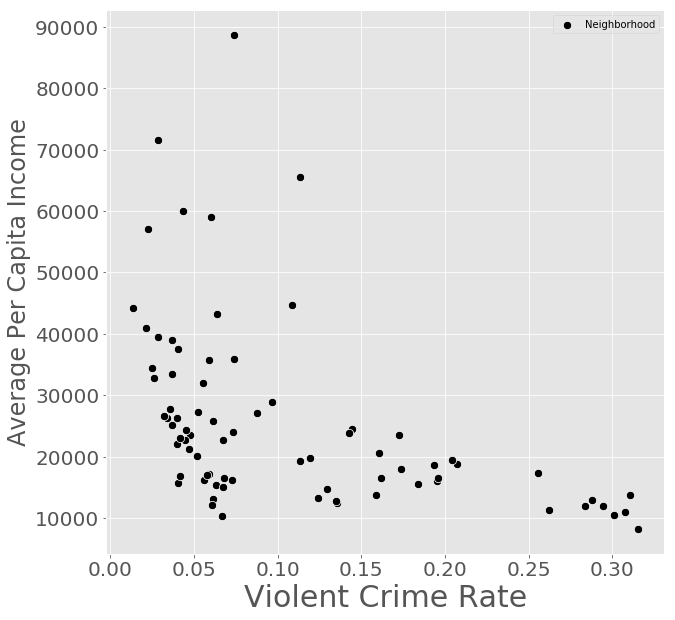

In [59]:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(x="vcrimerate", y="avgpci", data=vcrime, s=70, color='k', label='Neighborhood')
ax.set_xlabel("Violent Crime Rate",fontsize=30)
ax.tick_params(labelsize=20)
ax.set_ylabel("Average Per Capita Income",fontsize=24)

#for line in range(0,vcrime.shape[0]):
 #    ax.text(vcrime.crimerate[line]+0.2, vcrime.avgpci[line], vcrime.area[line], horizontalalignment='right', size='medium', color='black', weight='semibold')

Text(0, 0.5, 'Average Per Capita Income')

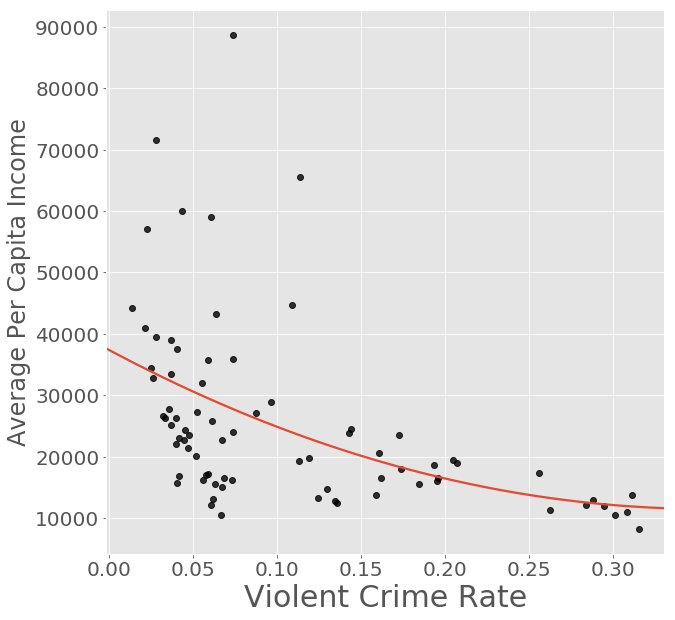

In [60]:
plt.figure(figsize=(10, 10))
ax2 = sns.regplot(x="vcrimerate", y="avgpci", data=vcrime, order=2,
           ci=None, scatter_kws={"color": "black"});
ax2.set_xlabel("Violent Crime Rate",fontsize=30)
ax2.tick_params(labelsize=20)
ax2.set_ylabel("Average Per Capita Income",fontsize=24)

In [61]:
corr=vcrime[['avgpci','vcrimerate']].corr()
corr.style.background_gradient()

,avgpci,vcrimerate
avgpci,1,-0.455667
vcrimerate,-0.455667,1


### After visualizing the data, and constructing a correlation matrix of average PCI and violent crime rates, we have confirmed, based on this data, that there exists a much stronger negative relationship between average PCI and violent crime than between average PCI and crime more generally. 

### In response to our research question: "What correlation, if any, exists between crime and average per capita income (PCI) across Chicago's 77 community areas?" 

### This information appears to confirm that there is indeed a negative correlation, and, when focused particularly on violent crimes, the negative correlation is quite strong. With more data, I would expect for the relationship to be even stronger than what we have seen here. 